# DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR INSURANCE CLAIMS DATA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims = pd.read_csv("D:\Analytics lab\Python\Case Study\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv")
claims

claim_id  customer_id      incident_cause  claim_date claim_area  \
0     54004764     21868593        Driver error  11/27/2017       Auto   
1     33985796     75740424               Crime  10/03/2018       Home   
2     53522022     30308357  Other driver error  02/02/2018       Auto   
3     13015401     47830476      Natural causes  06/17/2018       Auto   
4     22890252     19269962               Crime  01/13/2018       Auto   
...        ...          ...                 ...         ...        ...   
1095  97727122     35951012  Other driver error  06/11/2017       Auto   
1096  10247193     14818669      Natural causes  03/14/2018       Auto   
1097  79807493     85322831  Other driver error  02/09/2018       Auto   
1098  69299345     73449366        Other causes  03/21/2018       Auto   
1099  58809728     43020876  Other driver error  06/04/2017       Auto   

     police_report           claim_type claim_amount  total_policy_claims  \
0               No        Material only        $2980                  1.0   
1          Unknown        Material only        $2980                  3.0   
2               No        Material only      $3369.5                  1.0   
3               No        Material only        $1680                  1.0   
4               No        Material only        $2680                  1.0   
...            ...                  ...          ...                  ...   
1095            No        Material only        $3059                  4.0   
1096            No        Material only        $1520                  2.0   
1097            No  Material and injury       $23575                  2.0   
1098       Unknown  Material and injury       $25120                  1.0   
1099           Yes  Material and injury       $36685                  3.0   

     fraudulent  
0            No  
1            No  
2           Yes  
3            No  
4            No  
...         ...  
1095        Yes  
1096         No  
1097        Yes  
1098         No  
1099        Yes  

[1100 rows x 10 columns]

In [3]:
cust_demo = pd.read_csv("D:\Analytics lab\Python\Case Study\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
cust_demo

CUST_ID  gender DateOfBirth State       Contact   Segment
0     21868593  Female   12-Jan-79    VT  789-916-8172  Platinum
1     75740424  Female   13-Jan-70    ME  265-543-1264    Silver
2     30308357  Female   11-Mar-84    TN  798-631-4758    Silver
3     47830476  Female   01-May-86    MA  413-187-7945    Silver
4     19269962    Male   13-May-77    NV  956-871-8691      Gold
...        ...     ...         ...   ...           ...       ...
1080  79539873  Female   15-Mar-81    ND  459-425-4319  Platinum
1081  42364152  Female   07-Jul-96    ID  529-462-1635    Silver
1082  19888166    Male   11-Apr-90    WI  712-651-9613      Gold
1083  11256802  Female   22-Oct-64    LA  469-345-5617    Silver
1084  61575264    Male   12-Jul-95    WY  182-385-1392      Gold

[1085 rows x 6 columns]

In [4]:
cust_claims = pd.merge(left=cust_demo , right=claims , left_on='CUST_ID' , right_on='customer_id' ,how ='inner')
cust_claims.drop( columns='customer_id', axis=1, inplace= True)
cust_claims.head()

CUST_ID  gender DateOfBirth State       Contact   Segment  claim_id  \
0  21868593  Female   12-Jan-79    VT  789-916-8172  Platinum  54004764   
1  75740424  Female   13-Jan-70    ME  265-543-1264    Silver  33985796   
2  30308357  Female   11-Mar-84    TN  798-631-4758    Silver  53522022   
3  30308357  Female   11-Mar-84    TN  798-631-4758    Silver  63017412   
4  47830476  Female   01-May-86    MA  413-187-7945    Silver  13015401   

       incident_cause  claim_date claim_area police_report     claim_type  \
0        Driver error  11/27/2017       Auto            No  Material only   
1               Crime  10/03/2018       Home       Unknown  Material only   
2  Other driver error  02/02/2018       Auto            No  Material only   
3        Driver error  04/04/2018       Auto            No  Material only   
4      Natural causes  06/17/2018       Auto            No  Material only   

  claim_amount  total_policy_claims fraudulent  
0        $2980                  1.0         No  
1        $2980                  3.0         No  
2      $3369.5                  1.0        Yes  
3        $1950                  6.0         No  
4        $1680                  1.0         No

### Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [5]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [6]:
cust_claims['claim_date'] = pd.to_datetime(cust_claims['claim_date'] )
cust_claims['DateOfBirth'] = pd.to_datetime(cust_claims['DateOfBirth'])
cust_claims['DateOfBirth'] = np.where(cust_claims['DateOfBirth'].dt.year >2020 , 
                                      cust_claims['DateOfBirth'] - pd.DateOffset(years= 100), cust_claims['DateOfBirth'] )

In [7]:
cust_claims.head()

CUST_ID  gender DateOfBirth State       Contact   Segment  claim_id  \
0  21868593  Female  1979-01-12    VT  789-916-8172  Platinum  54004764   
1  75740424  Female  1970-01-13    ME  265-543-1264    Silver  33985796   
2  30308357  Female  1984-03-11    TN  798-631-4758    Silver  53522022   
3  30308357  Female  1984-03-11    TN  798-631-4758    Silver  63017412   
4  47830476  Female  1986-05-01    MA  413-187-7945    Silver  13015401   

       incident_cause claim_date claim_area police_report     claim_type  \
0        Driver error 2017-11-27       Auto            No  Material only   
1               Crime 2018-10-03       Home       Unknown  Material only   
2  Other driver error 2018-02-02       Auto            No  Material only   
3        Driver error 2018-04-04       Auto            No  Material only   
4      Natural causes 2018-06-17       Auto            No  Material only   

  claim_amount  total_policy_claims fraudulent  
0        $2980                  1.0         No  
1        $2980                  3.0         No  
2      $3369.5                  1.0        Yes  
3        $1950                  6.0         No  
4        $1680                  1.0         No

In [8]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   object        
 13  total_policy_claims  1075 non-nul

### Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign


In [9]:
cust_claims.claim_amount = cust_claims.claim_amount.str.replace('$', '').astype('float')
cust_claims.head()

C:\Users\malik\AppData\Local\Temp\ipykernel_10716\1510211926.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claims.claim_amount = cust_claims.claim_amount.str.replace('$', '').astype('float')


CUST_ID  gender DateOfBirth State       Contact   Segment  claim_id  \
0  21868593  Female  1979-01-12    VT  789-916-8172  Platinum  54004764   
1  75740424  Female  1970-01-13    ME  265-543-1264    Silver  33985796   
2  30308357  Female  1984-03-11    TN  798-631-4758    Silver  53522022   
3  30308357  Female  1984-03-11    TN  798-631-4758    Silver  63017412   
4  47830476  Female  1986-05-01    MA  413-187-7945    Silver  13015401   

       incident_cause claim_date claim_area police_report     claim_type  \
0        Driver error 2017-11-27       Auto            No  Material only   
1               Crime 2018-10-03       Home       Unknown  Material only   
2  Other driver error 2018-02-02       Auto            No  Material only   
3        Driver error 2018-04-04       Auto            No  Material only   
4      Natural causes 2018-06-17       Auto            No  Material only   

   claim_amount  total_policy_claims fraudulent  
0        2980.0                  1.0         No  
1        2980.0                  3.0         No  
2        3369.5                  1.0        Yes  
3        1950.0                  6.0         No  
4        1680.0                  1.0         No

In [10]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float64       
 13  total_policy_claims  1075 non-nul

### Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [11]:
cust_claims['unreported_claims']= np.where(cust_claims.police_report== 'Unknown',1,0)
cust_claims.head()

CUST_ID  gender DateOfBirth State       Contact   Segment  claim_id  \
0  21868593  Female  1979-01-12    VT  789-916-8172  Platinum  54004764   
1  75740424  Female  1970-01-13    ME  265-543-1264    Silver  33985796   
2  30308357  Female  1984-03-11    TN  798-631-4758    Silver  53522022   
3  30308357  Female  1984-03-11    TN  798-631-4758    Silver  63017412   
4  47830476  Female  1986-05-01    MA  413-187-7945    Silver  13015401   

       incident_cause claim_date claim_area police_report     claim_type  \
0        Driver error 2017-11-27       Auto            No  Material only   
1               Crime 2018-10-03       Home       Unknown  Material only   
2  Other driver error 2018-02-02       Auto            No  Material only   
3        Driver error 2018-04-04       Auto            No  Material only   
4      Natural causes 2018-06-17       Auto            No  Material only   

   claim_amount  total_policy_claims fraudulent  unreported_claims  
0        2980.0                  1.0         No                  0  
1        2980.0                  3.0         No                  1  
2        3369.5                  1.0        Yes                  0  
3        1950.0                  6.0         No                  0  
4        1680.0                  1.0         No                  0

### Q5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. 

In [12]:
cust_claims =  cust_claims.drop_duplicates( subset=['CUST_ID'])
cust_claims.head()

CUST_ID  gender DateOfBirth State       Contact   Segment  claim_id  \
0  21868593  Female  1979-01-12    VT  789-916-8172  Platinum  54004764   
1  75740424  Female  1970-01-13    ME  265-543-1264    Silver  33985796   
2  30308357  Female  1984-03-11    TN  798-631-4758    Silver  53522022   
4  47830476  Female  1986-05-01    MA  413-187-7945    Silver  13015401   
6  19269962    Male  1977-05-13    NV  956-871-8691      Gold  22890252   

       incident_cause claim_date claim_area police_report     claim_type  \
0        Driver error 2017-11-27       Auto            No  Material only   
1               Crime 2018-10-03       Home       Unknown  Material only   
2  Other driver error 2018-02-02       Auto            No  Material only   
4      Natural causes 2018-06-17       Auto            No  Material only   
6               Crime 2018-01-13       Auto            No  Material only   

   claim_amount  total_policy_claims fraudulent  unreported_claims  
0        2980.0                  1.0         No                  0  
1        2980.0                  3.0         No                  1  
2        3369.5                  1.0        Yes                  0  
4        1680.0                  1.0         No                  0  
6        2680.0                  1.0         No                  0

### Q6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [13]:
cust_claims.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
unreported_claims       0
dtype: int64

In [14]:
cust_claims["claim_amount"]= cust_claims['claim_amount'].replace(np.NaN,cust_claims['claim_amount'].mean())
cust_claims["claim_amount"].isna().sum()

0

In [15]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1078 non-null   int64         
 1   gender               1078 non-null   object        
 2   DateOfBirth          1078 non-null   datetime64[ns]
 3   State                1078 non-null   object        
 4   Contact              1078 non-null   object        
 5   Segment              1078 non-null   object        
 6   claim_id             1078 non-null   int64         
 7   incident_cause       1078 non-null   object        
 8   claim_date           1078 non-null   datetime64[ns]
 9   claim_area           1078 non-null   object        
 10  police_report        1078 non-null   object        
 11  claim_type           1078 non-null   object        
 12  claim_amount         1078 non-null   float64       
 13  total_policy_claims  1068 non-nul

In [16]:
cust_claims["total_policy_claims"] = cust_claims['total_policy_claims'].fillna(cust_claims['total_policy_claims'].mode()[0])
cust_claims["total_policy_claims"]= cust_claims["total_policy_claims"].astype(str)

In [17]:
cust_claims.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
unreported_claims      0
dtype: int64

### Q7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria :  Children < 18 , Youth 18-30 , Adult 30-60 , Senior > 60

In [18]:
cust_claims['age'] = (pd.Timestamp('now')-cust_claims['DateOfBirth']).astype('<m8[Y]')
cust_claims.age.head()

0    44.0
1    53.0
2    39.0
4    37.0
6    46.0
Name: age, dtype: float64

In [19]:
def age_group (x):
    if x.age < 18 :
        return 'children'
    elif x.age < 30:
        return 'youth'
    elif x.age <= 60:
        return 'adult'
    else :
        return 'senior'

In [20]:
cust_claims['age_group'] = cust_claims.apply(age_group , axis = 1)
cust_claims.head(10)

CUST_ID  gender DateOfBirth State       Contact   Segment  claim_id  \
0   21868593  Female  1979-01-12    VT  789-916-8172  Platinum  54004764   
1   75740424  Female  1970-01-13    ME  265-543-1264    Silver  33985796   
2   30308357  Female  1984-03-11    TN  798-631-4758    Silver  53522022   
4   47830476  Female  1986-05-01    MA  413-187-7945    Silver  13015401   
6   19269962    Male  1977-05-13    NV  956-871-8691      Gold  22890252   
8   21831191    Male  1977-05-17    NH  419-712-8513      Gold  24050443   
10  18401412    Male  1999-03-02    AR  752-398-2914      Gold  12878692   
11  73486606    Male  1999-10-25    AK  256-968-9172    Silver  27026412   
12  32813689    Male  1993-10-12    ID  142-324-7481    Silver  43908336   
13  33507197  Female  1966-09-09    RI  165-519-4583      Gold  63246959   

        incident_cause claim_date claim_area police_report     claim_type  \
0         Driver error 2017-11-27       Auto            No  Material only   
1                Crime 2018-10-03       Home       Unknown  Material only   
2   Other driver error 2018-02-02       Auto            No  Material only   
4       Natural causes 2018-06-17       Auto            No  Material only   
6                Crime 2018-01-13       Auto            No  Material only   
8   Other driver error 2017-10-04       Auto            No    Injury only   
10        Driver error 2018-01-13       Auto            No  Material only   
11      Natural causes 2018-04-10       Auto            No  Material only   
12               Crime 2018-02-15       Auto       Unknown  Material only   
13               Crime 2017-07-22       Auto            No  Material only   

    claim_amount total_policy_claims fraudulent  unreported_claims   age  \
0         2980.0                 1.0         No                  0  44.0   
1         2980.0                 3.0         No                  1  53.0   
2         3369.5                 1.0        Yes                  0  39.0   
4         1680.0                 1.0         No                  0  37.0   
6         2680.0                 1.0         No                  0  46.0   
8        38306.5                 3.0        Yes                  0  46.0   
10        1730.0                 4.0         No                  0  24.0   
11        1160.0                 3.0         No                  0  23.0   
12        2620.0                 1.0         No                  1  29.0   
13        2748.5                 2.0        Yes                  0  56.0   

   age_group  
0      adult  
1      adult  
2      adult  
4      adult  
6      adult  
8      adult  
10     youth  
11     youth  
12     youth  
13     adult

### Q8. What is the average amount claimed by the customers from various segments?

In [21]:
round(cust_claims.groupby('Segment')[['claim_amount']].mean(),2)

claim_amount
Segment               
Gold          12756.48
Platinum      12369.30
Silver        12269.43

### Q9. What is the total claim amount based on incident cause for all the claimsthat have been done at least 20 days prior to 1st of October, 2018.

In [22]:
round(cust_claims.loc[cust_claims.claim_date < '2018-9-10',:].groupby('incident_cause')[['claim_amount']].sum(),2)

claim_amount
incident_cause                  
Crime                  724462.49
Driver error          3264285.98
Natural causes        1312705.99
Other causes          3725038.47
Other driver error    3318806.48

### Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [23]:
cust_claims.loc[((cust_claims.State == 'TX') | (cust_claims.State == 'DE') | (cust_claims.State == 'AK'))
                & (cust_claims.incident_cause.str.lower().str.contains('driver'))
                & (cust_claims.age_group == 'adult') ,:].groupby('State')[['State']].count()

State
State       
AK         9
DE        10
TX         9

### Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [24]:
gender_seg = pd.pivot_table(cust_claims, values= 'claim_amount', index='gender', columns='Segment')
gender_seg

Segment          Gold      Platinum        Silver
gender                                           
Female   12337.798168  12277.220154  11647.598041
Male     13114.452404  12475.092191  12823.311354

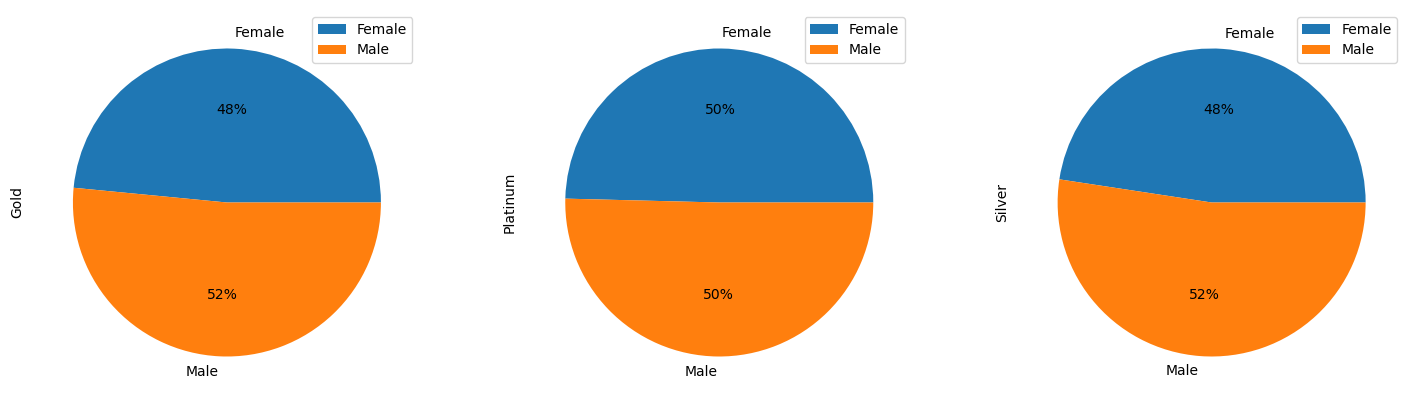

In [25]:
gender_seg.plot(kind = 'pie', autopct="%1.0f%%",subplots= True , figsize =(18,5))
plt.show()

### Q12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [26]:
d1 = cust_claims.loc[cust_claims.incident_cause.str.lower().str.contains('driver')
                     ,:].groupby('gender')[['gender']].count().add_prefix("CountOf_").reset_index()
d1

gender  CountOf_gender
0  Female             221
1    Male             280

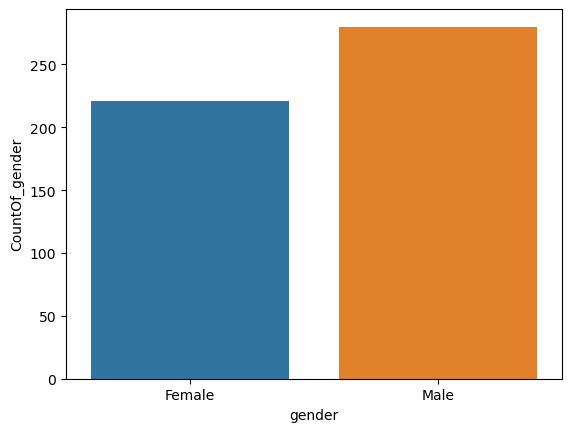

In [27]:
sns.barplot(x = "gender", y = "CountOf_gender", data = d1)
plt.show()

### Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [28]:
fraud_age = cust_claims.groupby('age_group')[['fraudulent']].count().reset_index()
fraud_age

age_group  fraudulent
0     adult         822
1    senior          58
2     youth         198

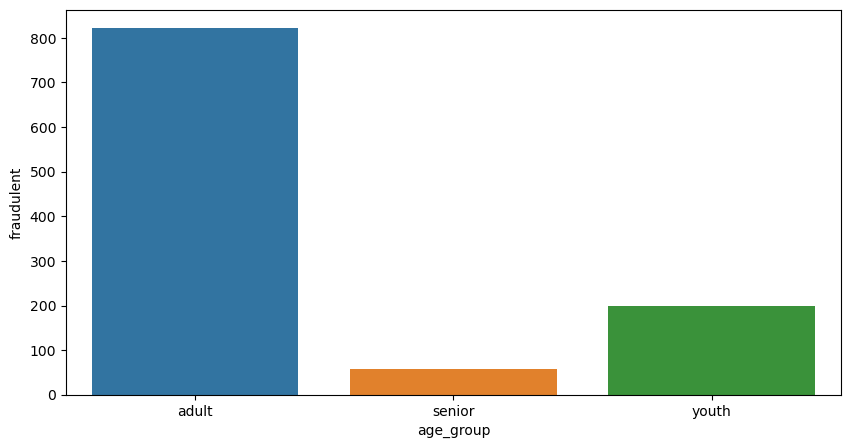

In [29]:
plt.figure(figsize=(10,5))
sns.barplot( x = 'age_group', y ='fraudulent' , data = fraud_age)
plt.show()

In [30]:
## Adult group had maximum fraudulant policy claims.

### Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [31]:
cust_claims['month'] = cust_claims['claim_date'].apply(lambda x: pd.Timestamp.strftime(x , format = '%B'))

In [32]:
monthly_amount = round(cust_claims.groupby('month')[['claim_amount']].sum().reset_index(),2)
monthly_amount

month  claim_amount
0       April    1276071.50
1      August     911203.50
2    December     696701.50
3    February    1133106.99
4     January    1332011.99
5        July    1379034.99
6        June    1276332.99
7       March    1320093.99
8         May    1114211.49
9    November     601125.00
10    October    1422655.49
11  September     980647.99

In [33]:
monthly_amount['New_month'] = pd.DatetimeIndex(pd.to_datetime(monthly_amount['month'], format='%B')).month
monthly_amount = monthly_amount.sort_values(by='New_month' )
monthly_amount

month  claim_amount  New_month
4     January    1332011.99          1
3    February    1133106.99          2
7       March    1320093.99          3
0       April    1276071.50          4
8         May    1114211.49          5
6        June    1276332.99          6
5        July    1379034.99          7
1      August     911203.50          8
11  September     980647.99          9
10    October    1422655.49         10
9    November     601125.00         11
2    December     696701.50         12

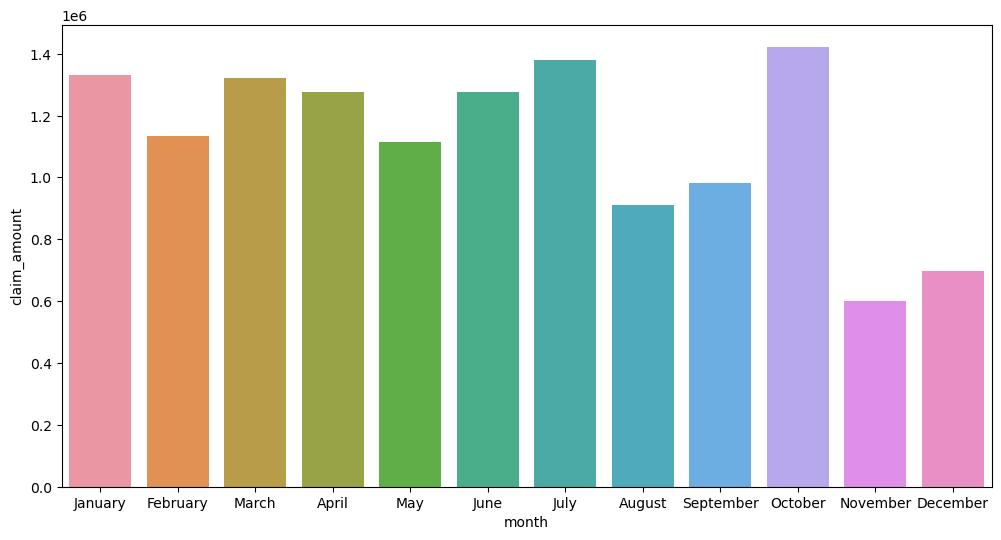

In [34]:
plt.figure( figsize = (12,6))
sns.barplot( data = monthly_amount , x = 'month' , y ='claim_amount')
plt.show()

### Q15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [35]:
gender_age =  round(pd.pivot_table( data = cust_claims, index = ['age_group',
               'fraudulent'] , columns='gender' , values = 'claim_amount').reset_index(), 2)
gender_age.set_index('age_group' , inplace = True)
gender_age

gender    fraudulent    Female      Male
age_group                               
adult             No  12034.88  12061.31
adult            Yes  12105.83  15827.23
senior            No  16314.62  13208.12
senior           Yes   4387.89  28232.50
youth             No  12958.08  12387.26
youth            Yes   9214.55   8170.00

In [36]:
fraudulant_claim = gender_age.loc[gender_age.fraudulent == 'Yes']
fraudulant_claim

gender    fraudulent    Female      Male
age_group                               
adult            Yes  12105.83  15827.23
senior           Yes   4387.89  28232.50
youth            Yes   9214.55   8170.00

In [37]:
non_fraudulant_claim = gender_age.loc[gender_age.fraudulent == 'No']
non_fraudulant_claim

gender    fraudulent    Female      Male
age_group                               
adult             No  12034.88  12061.31
senior            No  16314.62  13208.12
youth             No  12958.08  12387.26

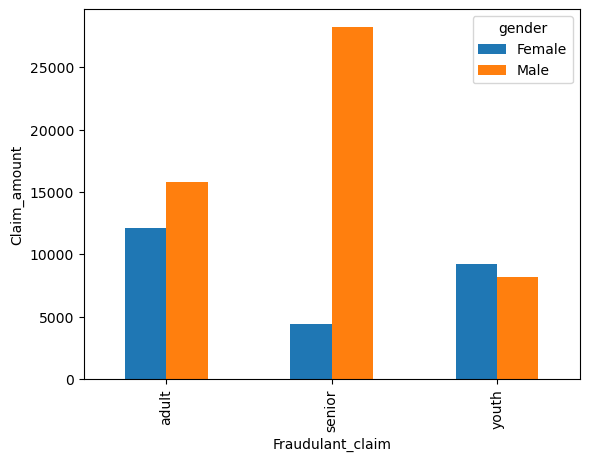

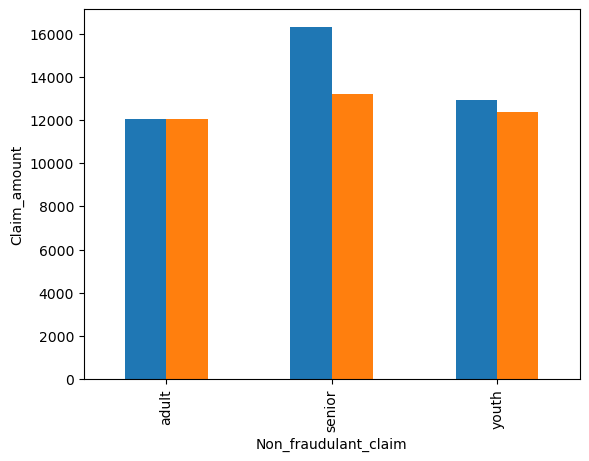

In [38]:
fraudulant_claim.plot(kind = 'bar' )
plt.xlabel('Fraudulant_claim')
plt.ylabel('Claim_amount')

non_fraudulant_claim.plot(kind = 'bar', legend = False)
plt.xlabel('Non_fraudulant_claim')
plt.ylabel('Claim_amount')

plt.show()

### Q16. Is there any similarity in the amount claimed by males and females?

In [39]:
cust_claims.gender.unique()

array(['Female', 'Male'], dtype=object)

In [40]:
male = cust_claims.loc[ cust_claims.gender == 'Male', 'claim_amount' ]
female = cust_claims.loc[ cust_claims.gender == 'Female', 'claim_amount']

# print the avg/mean of male & female claim amount 
print( 'mean of male claim amount:', round(male.mean(), 1), 
 '| mean of female claim amount:', round(female.mean(), 1))

mean of male claim amount: 12822.8 | mean of female claim amount: 12102.1


In [41]:
# Ho: male claimed = female claimed
# Ha: male claimed <> female claimed

# CI: 95%
# p value: 1-CI = 0.05
  
# rejection rule: if p is low; null will go, if p is high; null will fly

# perform the test : t-test
print( stats.ttest_ind( male, female ) )

Ttest_indResult(statistic=0.8848703612768548, pvalue=0.3764242430541366)


In [42]:
# Business conclusion:

# since the latest or new p value is 0.3764242430541366 which is greater than the previous p value hence we can accept our null 
# hypothesis ie, ho. With the give data we can not say the amount claimed by the male and female customer is different.

### Q17. Is there any relationship between age category and segment?

In [43]:
# data prep for chi square test
obs = pd.crosstab( cust_claims.age_group, cust_claims.Segment )
print('observed frequency table', '\n', obs)

# Ho: No relationship between age category and segment, independant
# Ha: Relationship between age category and segment, dependant
   
# CI: 95%
# p value: 1-CI = 0.05
  
# rejection rule:if p is low; null will go, if p is high; null will fly

# perform the test : chi square test

print('\n\n', 'expected frequency table', '\n', 
      pd.DataFrame(stats.chi2_contingency( obs )[3]).round(0))

stats.chi2_contingency( obs )

observed frequency table 
 Segment    Gold  Platinum  Silver
age_group                        
adult       285       274     263
senior       20        20      18
youth        66        67      65


 expected frequency table 
        0      1      2
0  283.0  275.0  264.0
1   20.0   19.0   19.0
2   68.0   66.0   64.0


(0.16942512876477325,
 0.996608234967805,
 4,
 array([[282.8961039 , 275.27087199, 263.83302412],
        [ 19.96103896,  19.42300557,  18.61595547],
        [ 68.14285714,  66.30612245,  63.55102041]]))

In [44]:
# Business conclusion:

# As observed and expected frequency table have different values Also, the significance value of the test is 0.9817053380520192 
# ie. greater than 0.05, we accept the null hypothesis that there is no relationship between age category and segment.

### Q18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [45]:
print( 'mean of sample claim amount:', round(cust_claims.claim_amount.mean(), 1) )

mean of sample claim amount: 12470.5


In [46]:
# Ho: claim_amount <= 10000
# Ha: claim_amount > 10000

# CI: 95%
# p value: 1-CI = 0.05
  
# rejection rule:if p is low; null will go, if p is high; null will fly

# perform the test: t-test
print( stats.ttest_1samp( cust_claims.claim_amount, 10000 ) )

Ttest_1sampResult(statistic=6.068796577191385, pvalue=1.7827316562159517e-09)


In [47]:
# Business conclusion:

# since the latest or new p value is 1.7827316562159517e-09 which is less than the previous p value (0.05) Hence, we can 
# reject our null hypothesis ie, ho. hence, Average claim amount of the customers has increase from 2016-17 fiscal average 
# which was $10,000.

### Q19. Is there any difference between age groups and insurance claims?

In [48]:
cust_claims.age_group.unique()

array(['adult', 'youth', 'senior'], dtype=object)

In [49]:
# data prep
cust_claims.age_group.unique()

# select the usage variable
var = 'claim_amount'

# get the 3 samples, one for each segment of customer
s1 = cust_claims.loc[ cust_claims.age_group == 'adult', var ]
s2 = cust_claims.loc[ cust_claims.age_group == 'youth', var ]
s3 = cust_claims.loc[ cust_claims.age_group == 'senior', var ]

# print the avg/mean of three samples
print( 'mean of s1:', round(s1.mean(), 1), 
          '|   mean of s2:', round(s2.mean(), 1), 
              ' |   mean of s3:', round(s3.mean(), 1) )

mean of s1: 12519.5 |   mean of s2: 11910.7  |   mean of s3: 13687.8


In [50]:
# Ho: samples are from same population
# Ha: samples are from different population
   
# CI: 95%
# p value: 1-CI = 0.05
  
# rejection rule:if  p is low; null will go, if p is high; null will fly

# perform the test: ANOVA test
print( stats.f_oneway( s1, s2, s3 ) )

F_onewayResult(statistic=0.41930480765134376, pvalue=0.6576112403437024)


In [51]:
# Business conclusion:

# since, the latest or new p value is 0.7463416935740613 which is greater than the previous p value (0.05) Hence, we can 
# accept our null hypothesis ie, ho. with the give data we cannot say that there is a difference between age groups and 
# insurance claims.

### Q20. Is there any relationship between total number of policy claims and the claimed amount?

In [52]:
cust_claims.head()

CUST_ID  gender DateOfBirth State       Contact   Segment  claim_id  \
0  21868593  Female  1979-01-12    VT  789-916-8172  Platinum  54004764   
1  75740424  Female  1970-01-13    ME  265-543-1264    Silver  33985796   
2  30308357  Female  1984-03-11    TN  798-631-4758    Silver  53522022   
4  47830476  Female  1986-05-01    MA  413-187-7945    Silver  13015401   
6  19269962    Male  1977-05-13    NV  956-871-8691      Gold  22890252   

       incident_cause claim_date claim_area police_report     claim_type  \
0        Driver error 2017-11-27       Auto            No  Material only   
1               Crime 2018-10-03       Home       Unknown  Material only   
2  Other driver error 2018-02-02       Auto            No  Material only   
4      Natural causes 2018-06-17       Auto            No  Material only   
6               Crime 2018-01-13       Auto            No  Material only   

   claim_amount total_policy_claims fraudulent  unreported_claims   age  \
0        2980.0                 1.0         No                  0  44.0   
1        2980.0                 3.0         No                  1  53.0   
2        3369.5                 1.0        Yes                  0  39.0   
4        1680.0                 1.0         No                  0  37.0   
6        2680.0                 1.0         No                  0  46.0   

  age_group     month  
0     adult  November  
1     adult   October  
2     adult  February  
4     adult      June  
6     adult   January

In [53]:
# Ho: No correlation between the total number of policy claims and the claimed amount, independant
# Ha: the total number of policy claims and the claimed amount are related, dependant
   
# CI: 95%
# p value: 1-CI = 0.05
  
# rejection rule: if p is low; null will go, if p is high; null will fly

# perform the test :correlation test (SpearmanrR test)
print( stats.spearmanr( cust_claims.claim_amount ,cust_claims.total_policy_claims ))

SpearmanrResult(correlation=0.008526490432594132, pvalue=0.7797615505440485)


C:\Users\malik\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [54]:
# Business conclusion:

# since, the latest or new p value is 0.7797615505440485 which is greater than the previous p value (0.05) Hence, we can 
# accept our null hypothesis ie, ho. Hence, with the give data we cannot say that  total no. of policy claims is related to 
# claim amount.